In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("data/full_data_encoded.csv", low_memory=False)

In [2]:
# Encoding Enso 
enso_ordered = {
    "VSE": -4,  # Very Strong El Niño
    "SE":  -3,  # Strong El Niño
    "ME":  -2,  # Moderate El Niño
    "WE":  -1,  # Weak El Niño
    "N":    0,  # Neutral
    "WL":   1,  # Weak La Niña
    "ML":   2,  # Moderate La Niña
    "SL":   3   # Strong La Niña
}


In [3]:
df

,index,Unnamed: 0,Date,Year,Month,Global Temperature Anomalies,Global Precipitation,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,...,Season (2-Month),MEI.ext,MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity,high,low,ENSO_encoded
0,120,120,1960-01-01,1960,JAN,0.04,NaN,NaN,NaN,NaN,...,DJ,-0.070,NaN,DJF,-0.1,1960-1961,N,32.290323,17.432258,0
1,121,121,1960-02-01,1960,FEB,0.15,NaN,NaN,NaN,NaN,...,JF,0.073,NaN,JFM,-0.1,1960-1961,N,30.275862,14.055172,0
2,122,122,1960-03-01,1960,MAR,-0.24,NaN,NaN,NaN,NaN,...,FM,0.106,NaN,FMA,-0.1,1960-1961,N,31.645161,12.535484,0
3,123,123,1960-04-01,1960,APR,-0.11,NaN,NaN,NaN,NaN,...,MA,0.167,NaN,MAM,0.0,1960-1961,N,58.566667,37.913333,0
4,124,124,1960-05-01,1960,MAY,-0.07,NaN,NaN,NaN,NaN,...,AM,0.177,NaN,AMJ,0.0,1960-1961,N,65.548387,47.412903,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,895,895,2024-08-01,2024,AUG,1.27,84.55,20.52,-0.34,24.97,...,JA,NaN,-0.73,JAS,-0.1,2024-2025,N,79.387097,61.129032,0
776,896,896,2024-09-01,2024,SEP,1.25,80.73,19.91,-0.68,24.85,...,AS,NaN,-0.65,ASO,-0.2,2024-2025,N,76.833333,54.933333,0
777,897,897,2024-10-01,2024,OCT,1.33,84.96,20.55,-0.32,25.04,...,SO,NaN,-0.52,SON,-0.3,2024-2025,N,66.129032,42.651613,0
778,898,898,2024-11-01,2024,NOV,1.32,81.76,21.88,0.26,25.17,...,ON,NaN,-0.68,OND,-0.4,2024-2025,N,49.666667,37.733333,0


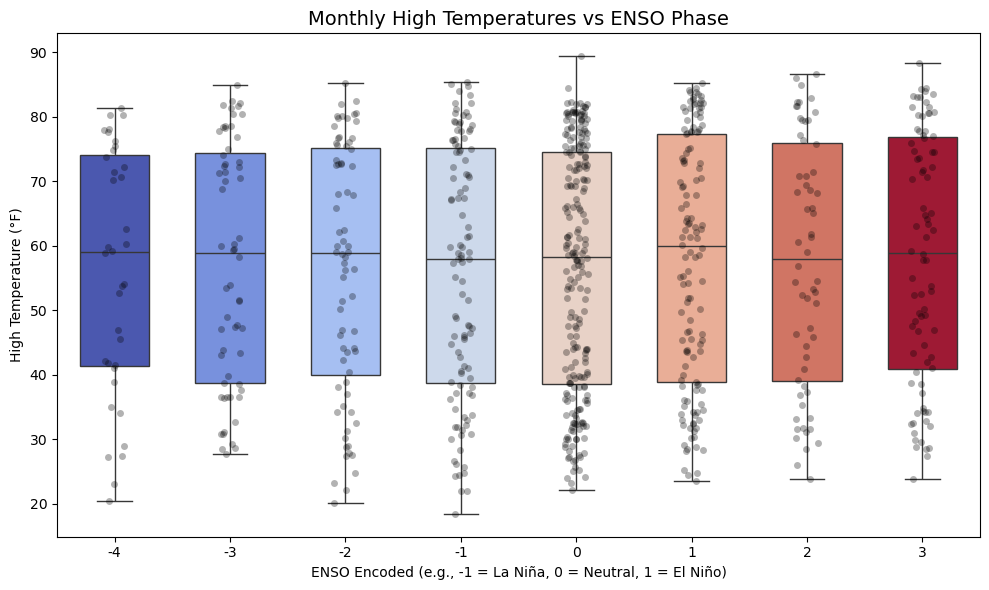

In [4]:
# Ensure numeric types
df["high"] = pd.to_numeric(df["high"], errors="coerce")
df["low"] = pd.to_numeric(df["low"], errors="coerce")
df["ENSO_encoded"] = pd.to_numeric(df["ENSO_encoded"], errors="coerce")

# Drop rows with missing values
df = df.dropna(subset=["high", "low", "ENSO_encoded"])

# Set up the plot
plt.figure(figsize=(10,6))
#sns.boxplot(data=df, x="ENSO_encoded", y="high", palette="coolwarm", width=0.6)
sns.stripplot(data=df, x="ENSO_encoded", y="high", color="black", alpha=0.3)

sns.boxplot(
    data=df,
    x="ENSO_encoded",
    y="high",
    hue="ENSO_encoded",
    palette="coolwarm",
    width=0.6,
    legend=False
)

plt.title("Monthly High Temperatures vs ENSO Phase", fontsize=14)
plt.xlabel("ENSO Encoded (e.g., -1 = La Niña, 0 = Neutral, 1 = El Niño)")
plt.ylabel("High Temperature (°F)")
plt.tight_layout()
plt.show()

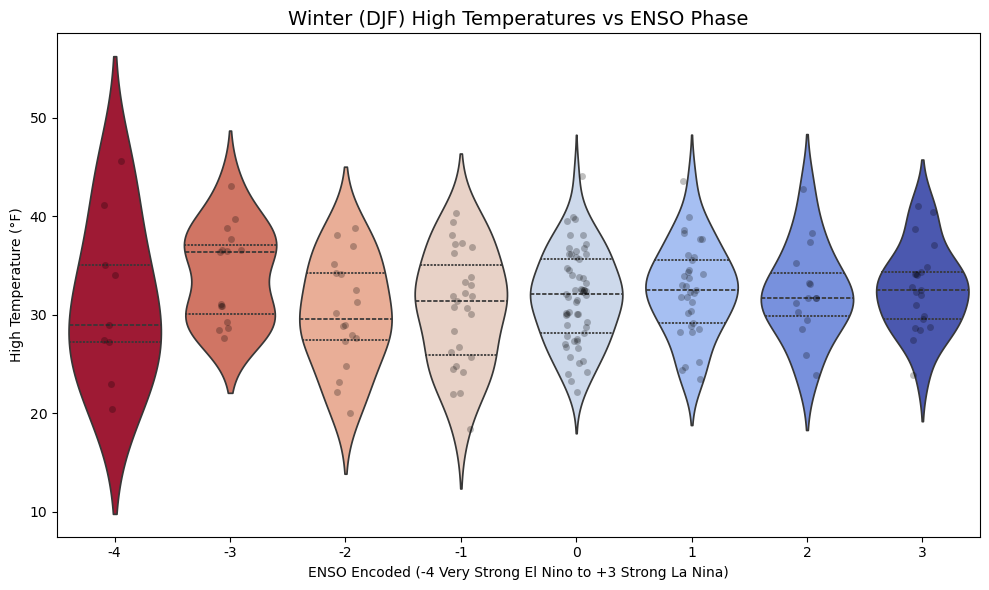

In [5]:
# Ensure numeric types
df["high"] = pd.to_numeric(df["high"], errors="coerce")
df["low"] = pd.to_numeric(df["low"], errors="coerce")
df["ENSO_encoded"] = pd.to_numeric(df["ENSO_encoded"], errors="coerce")

# Keep only winter months (December, January, February)
winter_months = ["DEC", "JAN", "FEB"]
df_winter = df[df["Month"].isin(winter_months)]

# Drop rows with missing key values
df_winter = df_winter.dropna(subset=["high", "low", "ENSO_encoded"])

# Plot
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df_winter,
    x="ENSO_encoded",
    y="high",
    hue="ENSO_encoded",
    palette="coolwarm_r",   # ← add the _r to reverse the palette
    inner="quartile",
    legend=False
)
sns.stripplot(
    data=df_winter,
    x="ENSO_encoded",
    y="high",
    color="black",
    alpha=0.25
)

plt.title("Winter (DJF) High Temperatures vs ENSO Phase", fontsize=14)
plt.xlabel("ENSO Encoded (-4 Very Strong El Nino to +3 Strong La Nina)")
plt.ylabel("High Temperature (°F)")
plt.tight_layout()
plt.show()

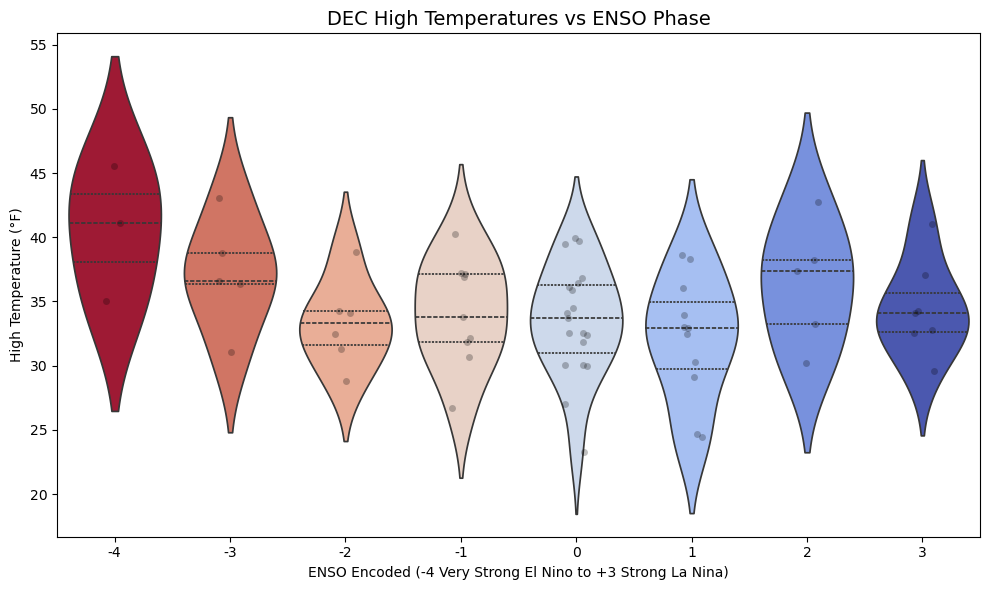

In [6]:
# Ensure numeric types
df["high"] = pd.to_numeric(df["high"], errors="coerce")
df["low"] = pd.to_numeric(df["low"], errors="coerce")
df["ENSO_encoded"] = pd.to_numeric(df["ENSO_encoded"], errors="coerce")

# Keep only winter months (December, January, February)
winter_months = ["DEC"]
df_dec = df[df["Month"].isin(winter_months)]

# Drop rows with missing key values
df_dec = df_dec.dropna(subset=["high", "low", "ENSO_encoded"])

# Plot
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df_dec,
    x="ENSO_encoded",
    y="high",
    hue="ENSO_encoded",
    palette="coolwarm_r",   # ← add the _r to reverse the palette
    inner="quartile",
    legend=False
)
sns.stripplot(
    data=df_dec,
    x="ENSO_encoded",
    y="high",
    color="black",
    alpha=0.25
)

plt.title("DEC High Temperatures vs ENSO Phase", fontsize=14)
plt.xlabel("ENSO Encoded (-4 Very Strong El Nino to +3 Strong La Nina)")
plt.ylabel("High Temperature (°F)")
plt.tight_layout()
plt.show()

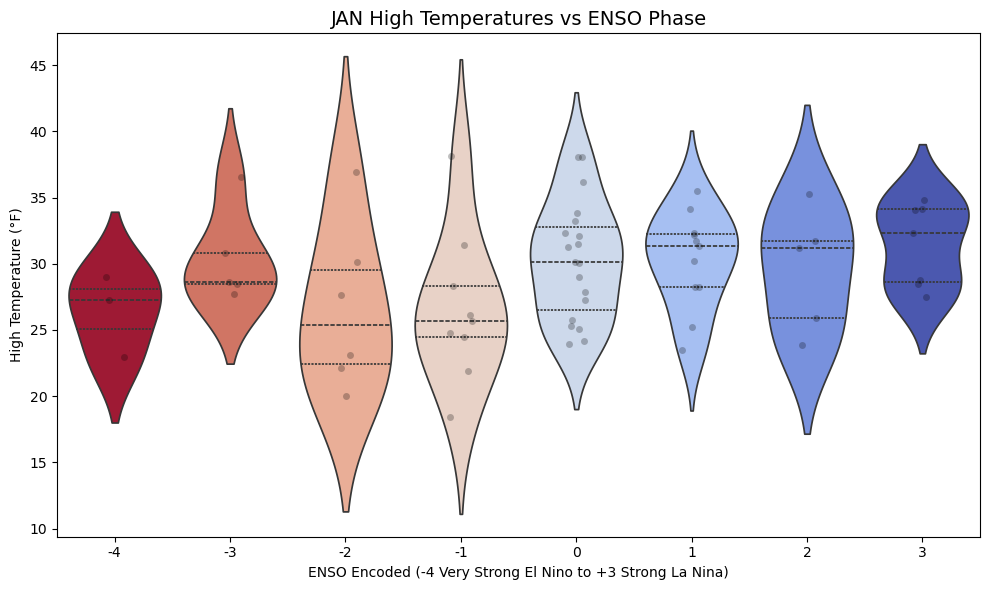

In [7]:
# Ensure numeric types
df["high"] = pd.to_numeric(df["high"], errors="coerce")
df["low"] = pd.to_numeric(df["low"], errors="coerce")
df["ENSO_encoded"] = pd.to_numeric(df["ENSO_encoded"], errors="coerce")

# Keep only winter months (December, January, February)
winter_months = ["JAN"]
df_jan = df[df["Month"].isin(winter_months)]

# Drop rows with missing key values
df_jan = df_jan.dropna(subset=["high", "low", "ENSO_encoded"])

# Plot
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df_jan,
    x="ENSO_encoded",
    y="high",
    hue="ENSO_encoded",
    palette="coolwarm_r",   # ← add the _r to reverse the palette
    inner="quartile",
    legend=False
)
sns.stripplot(
    data=df_jan,
    x="ENSO_encoded",
    y="high",
    color="black",
    alpha=0.25
)

plt.title("JAN High Temperatures vs ENSO Phase", fontsize=14)
plt.xlabel("ENSO Encoded (-4 Very Strong El Nino to +3 Strong La Nina)")
plt.ylabel("High Temperature (°F)")
plt.tight_layout()
plt.show()

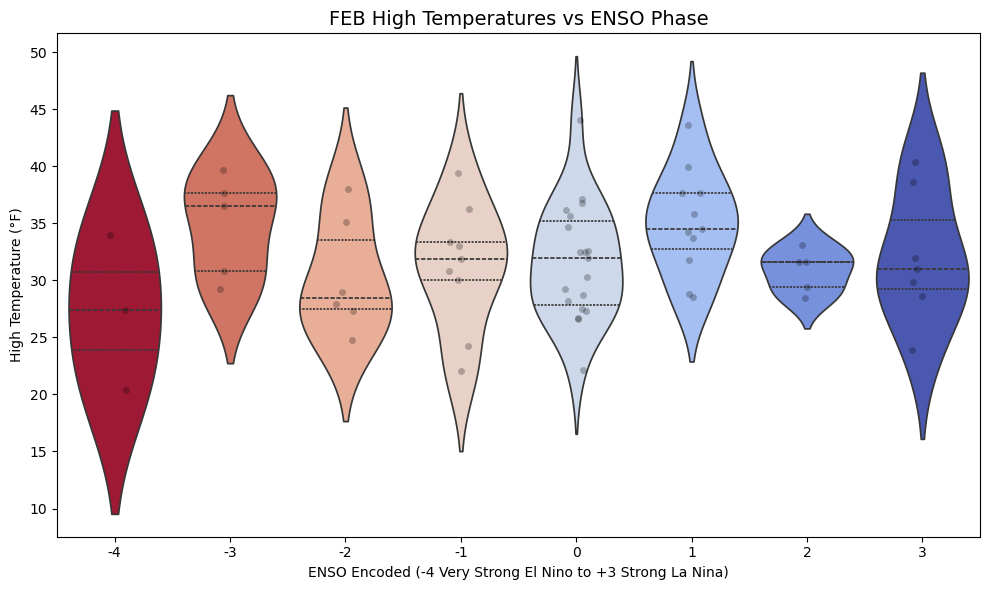

In [8]:
# Ensure numeric types
df["high"] = pd.to_numeric(df["high"], errors="coerce")
df["low"] = pd.to_numeric(df["low"], errors="coerce")
df["ENSO_encoded"] = pd.to_numeric(df["ENSO_encoded"], errors="coerce")

# Keep only winter months (December, January, February)
winter_months = ["FEB"]
df_feb = df[df["Month"].isin(winter_months)]

# Drop rows with missing key values
df_feb = df_feb.dropna(subset=["high", "low", "ENSO_encoded"])

# Plot
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df_feb,
    x="ENSO_encoded",
    y="high",
    hue="ENSO_encoded",
    palette="coolwarm_r",   # ← add the _r to reverse the palette
    inner="quartile",
    legend=False
)
sns.stripplot(
    data=df_feb,
    x="ENSO_encoded",
    y="high",
    color="black",
    alpha=0.25
)

plt.title("FEB High Temperatures vs ENSO Phase", fontsize=14)
plt.xlabel("ENSO Encoded (-4 Very Strong El Nino to +3 Strong La Nina)")
plt.ylabel("High Temperature (°F)")
plt.tight_layout()
plt.show()

In [9]:
# To handle winter seasons properly (Dec belongs to the *next year's* winter)
df["Season_Year"] = df.apply(
    lambda row: row["Year"] + 1 if row["Month"] == "DEC" else row["Year"], axis=1
)

In [10]:
# To handle winter seasons properly (Dec belongs to the *next year's* winter)
df["Season_Year"] = df.apply(
    lambda row: row["Year"] + 1 if row["Month"] == "DEC" else row["Year"], axis=1
)

# Keep only winter months (December, January, February)
winter_months = ["DEC", "JAN", "FEB"]
df_winter = df[df["Month"].isin(winter_months)]

# Average only the high temps per DJF season, keeping ENSO constant
winter_avg = (
    df_winter.groupby("Season_Year", as_index=False)
      .agg({
          "high": "mean",
          "ENSO_encoded": "first"   # ENSO is same across DJF, so just take the first value
      })
)

In [11]:
winter_avg

,Season_Year,high,ENSO_encoded
0,1960,31.283092,0
1,1961,31.380184,0
2,1962,28.338710,0
3,1963,24.960829,0
4,1964,32.876900,-2
...,...,...,...
61,2021,32.521505,2
62,2022,34.882104,2
63,2023,37.420891,1
64,2024,39.043752,-3


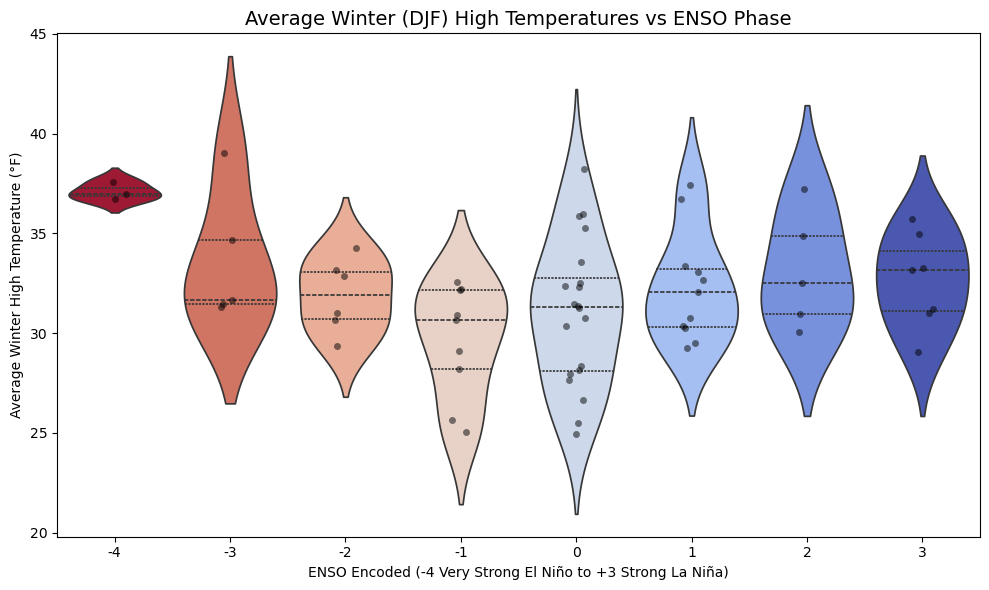

In [12]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=winter_avg,
    x="ENSO_encoded",
    y="high",
    hue="ENSO_encoded",
    palette="coolwarm_r",   # reversed so El Niño = red, La Niña = blue
    inner="quartile",
    legend=False
)
sns.stripplot(
    data=winter_avg,
    x="ENSO_encoded",
    y="high",
    color="black",
    alpha=0.5
)

plt.title("Average Winter (DJF) High Temperatures vs ENSO Phase", fontsize=14)
plt.xlabel("ENSO Encoded (-4 Very Strong El Niño to +3 Strong La Niña)")
plt.ylabel("Average Winter High Temperature (°F)")
plt.tight_layout()
plt.show()

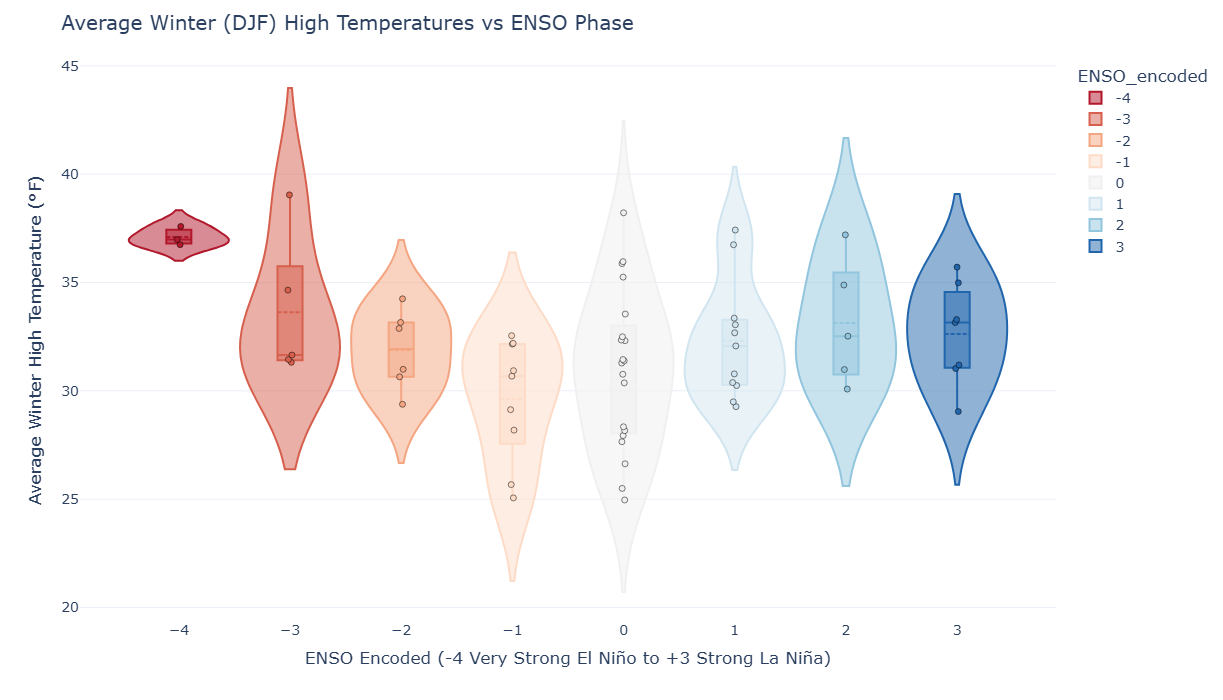

In [13]:
# Define order and color map
order = [-4, -3, -2, -1, 0, 1, 2, 3]
winter_avg["ENSO_encoded"] = pd.Categorical(winter_avg["ENSO_encoded"],
                                            categories=order, ordered=True)

enso_map = {
    -4: "#b2182b", -3: "#d6604d", -2: "#f4a582", -1: "#fddbc7",
     0: "#f0f0f0",  1: "#d1e5f0",  2: "#92c5de",  3: "#2166ac"
}
enso_map = {**enso_map, **{str(k): v for k, v in enso_map.items()}}

# Create violin plot
fig = px.violin(
    winter_avg,
    x="ENSO_encoded",
    y="high",
    color="ENSO_encoded",
    category_orders={"ENSO_encoded": order},
    color_discrete_map=enso_map,
    box=True,
    points="all",
    hover_data={"high":":.1f", "Season_Year": True, "ENSO_encoded": False}
)

# Make violins thicker, more visible, and fully opaque
fig.update_traces(
    width=0.9,
    meanline_visible=True,
    opacity=1.0,         # full opacity for clarity
    pointpos=0.0,        # points centered inside
    jitter=0.05,         # small horizontal spread to avoid overlap
    marker=dict(size=6, line=dict(width=0.5, color="black"))
)

# Increase figure size and adjust spacing
fig.update_layout(
    template="plotly_white",
    violingap=0.05,
    violinmode="overlay",
    width=1000,
    height=700,   # more vertical space
    title="Average Winter (DJF) High Temperatures vs ENSO Phase",
    xaxis_title="ENSO Encoded (-4 Very Strong El Niño to +3 Strong La Niña)",
    yaxis_title="Average Winter High Temperature (°F)",
    font=dict(size=14)
)

fig.show()

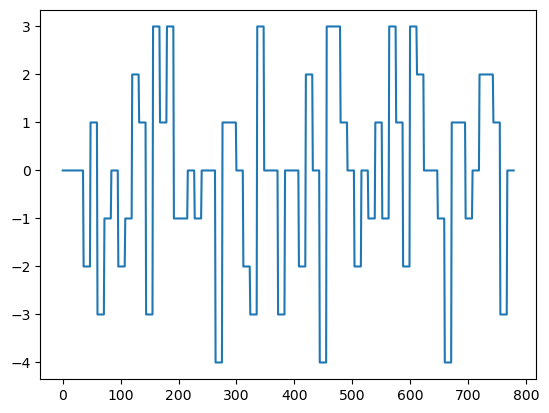

In [23]:
df_enso = df[["Month", "ENSO_encoded"]]

x = np.arange(np.array(df_enso["Month"]).size)
y = np.array(df_enso["ENSO_encoded"])

plt.plot(x,y)
plt.title("ENSO PHASE Osscilation")
plt.show()

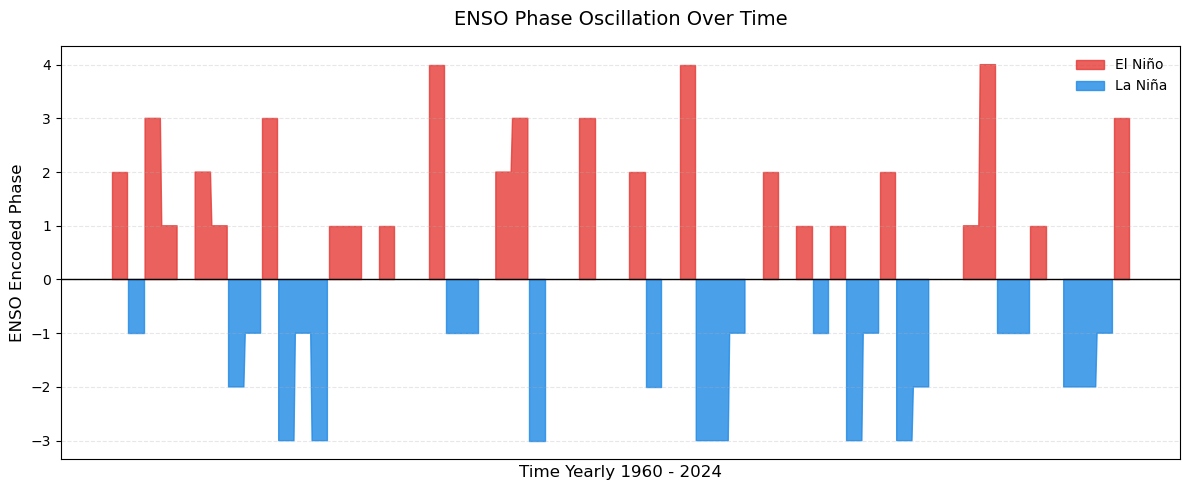

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.arange(len(df_enso))
y = np.array(df_enso["ENSO_encoded"]) * -1

# Create figure
plt.figure(figsize=(12, 5))

# Fill positive (El Niño) red
plt.fill_between(x, 0, y, where=(y > 0), color="#E53935", alpha=0.8, label="El Niño")

# Fill negative (La Niña) blue
plt.fill_between(x, 0, y, where=(y < 0), color="#1E88E5", alpha=0.8, label="La Niña")

# Baseline
plt.axhline(0, color="black", linewidth=1)

# Style
plt.title("ENSO Phase Oscillation Over Time", fontsize=14, pad=15)
plt.ylabel("ENSO Encoded Phase", fontsize=12)
plt.xlabel("Time Yearly 1960 - 2024", fontsize=12)
plt.grid(alpha=0.3, linestyle="--")

# Optional: hide crowded x-axis labels
plt.xticks([], [])

plt.legend(frameon=False)
plt.tight_layout()
plt.show()
